<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [1]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [2]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Create dataset with less samples

In [32]:
import random

def create_balanced_small_df(df, genres, percent_value, num_rows):
  num = percent_value / 100 * num_rows
  print('num', num)
  small_df_list = []
  for genre in genres:
    sample_rows = df.sample(num)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)

def create_imbalanced_small_df(df, genres, num_max):
  small_df_list = []
  for genre in genres:

    # sample_rows = df.sample(qtd)
    # small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)


In [33]:
genres = genres = df['genre'].unique()
num_max = 50 # Max number of docs by genre in small df
num = 20 # Number of docs by genre in small df

percent_value = 20
# small_df = create_balanced_small_df(df, genres, percent_value, small_df.shape[0])

percent_max_value = 20
small_df = create_imbalanced_small_df(df, genres, percent_max_value)

business 21
politics 32
tech 28
sport 27
entertainment 20


In [27]:
num_rows = small_df.shape[0]
print("Number of rows:", num_rows)


Number of rows: 128


# Pre Processing

In [5]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [6]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
123,business,262.txt,Asian quake hits European shares,share europ lead reinsur travel firm fall scal...
124,tech,389.txt,Mobile multimedia slow to catch on,doubt mobil phone sport camera colour screen h...
125,entertainment,257.txt,Row threatens Hendrix museum plan,propos open museum dedic jimi hendrix flail ro...
126,tech,381.txt,Kenyan school turns to handhelds,mbita point primari school western kenya stude...
127,entertainment,334.txt,Singer's film to show at festival,documentari take candid look life chart top si...


# Basic statistics analysis

##Documents number by class

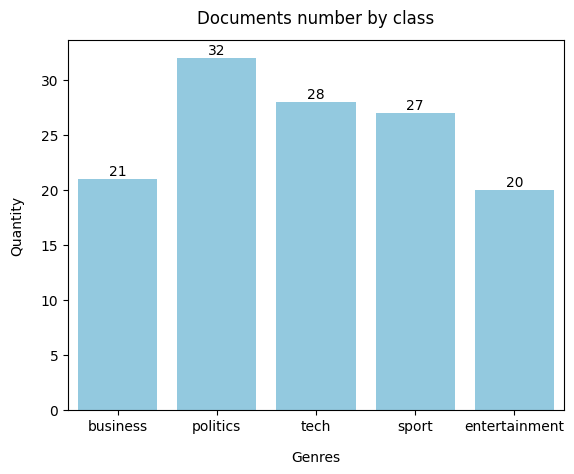

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

genres = df['genre'].unique()

def plot_doc_by_class(genres):
  ax = sns.countplot(x = 'genre', data = df , color='skyblue')
  ax.yaxis.grid(False)
  plt.title('Documents number by class', pad=12)
  plt.xlabel('Genres', labelpad=12)
  plt.ylabel('Quantity', labelpad=12)

  bars = ax.patches
  # Put numbers of docs above bars
  for bar in bars:
        height = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

  plt.show()


plot_doc_by_class(genres)

#Top 30 most frequent words

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

def get_genre_content(df, genre):
  content = df.loc[df['genre'] == genre, 'content'].str.cat(sep=' ')
  return content

def create_dict_content(df):
  dict_content = {}
  for genre in genres:
      dict_content[genre] = get_genre_content(df, genre)
      if 'all' in dict_content:
        dict_content['all'] += get_genre_content(df, genre)
      else:
          dict_content['all'] = get_genre_content(df, genre)
  return dict_content

def create_count_content(dict_content):
  count_content = {}
  for genre, content in dict_content.items():
      count_content[genre] = Counter(content.split())
  return count_content


def get_top_n_words(top_n, count_words):
    most_common_words = {}
    for word, count in count_words.most_common(top_n):
        most_common_words[word] = count
    return most_common_words


In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_h_most_common_words(top_n, count_content, genre, title, fontsize):
    most_common = get_top_n_words(top_n, count_content[genre])
    most_common = sorted(most_common.items(), key=lambda x: x[1])
    words = [item[0] for item in most_common ]
    counts = [item[1] for item in most_common ]
    plt.figure(figsize=(11, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Quantity', labelpad=15)
    plt.ylabel('Tokens', labelpad=15)
    plt.grid(False)
    plt.title(title, pad=15)
    #Display number of token in front of each bar
    for i in range(len(words)):
      plt.text(counts[i], i, ' ' + str(counts[i]), ha='left', va='center')

dict_content = create_dict_content(df)
count_content = create_count_content(dict_content)

In [10]:
print(count_content)

{'business': Counter({'say': 75, 'year': 32, 'firm': 32, 'compani': 31, 'price': 26, 'oil': 26, 'report': 26, 'mr': 23, 'market': 23, 'new': 22, 'we': 22, 'us': 19, 'cost': 19, 'may': 19, 'month': 19, 'bank': 19, 'dollar': 19, 'rise': 19, 'last': 18, 'would': 18, 'share': 18, 'fall': 18, 'time': 17, 'execut': 17, 'howev': 17, 'also': 17, 'contract': 16, '1': 16, 'iraq': 16, '5': 15, 'm': 15, 'car': 15, '3': 15, 'foreign': 15, '000': 14, 'chief': 14, 'yuko': 14, 'valu': 14, 'hous': 14, 'rate': 14, 'high': 13, 'make': 13, 'deutsch': 13, 'increas': 13, 'stock': 13, 'spend': 13, 'econom': 13, 'list': 12, 'tax': 12, 'qanta': 12, 'come': 12, 'cut': 11, 'two': 11, 'gazprom': 11, 'buy': 11, '0': 11, 'continu': 10, 'one': 10, 'low': 10, 'go': 10, 'build': 10, 'sale': 10, 'take': 10, 'analyst': 10, 'product': 10, 'could': 10, 'lead': 10, 'recent': 10, 'investor': 10, 'vivendi': 10, 'budget': 10, 'deal': 9, 'bankruptci': 9, 'industri': 9, 'uk': 9, 'output': 9, '2': 9, 'ga': 9, 'expect': 9, 'law':

##Top 30 most frequent tokens in business

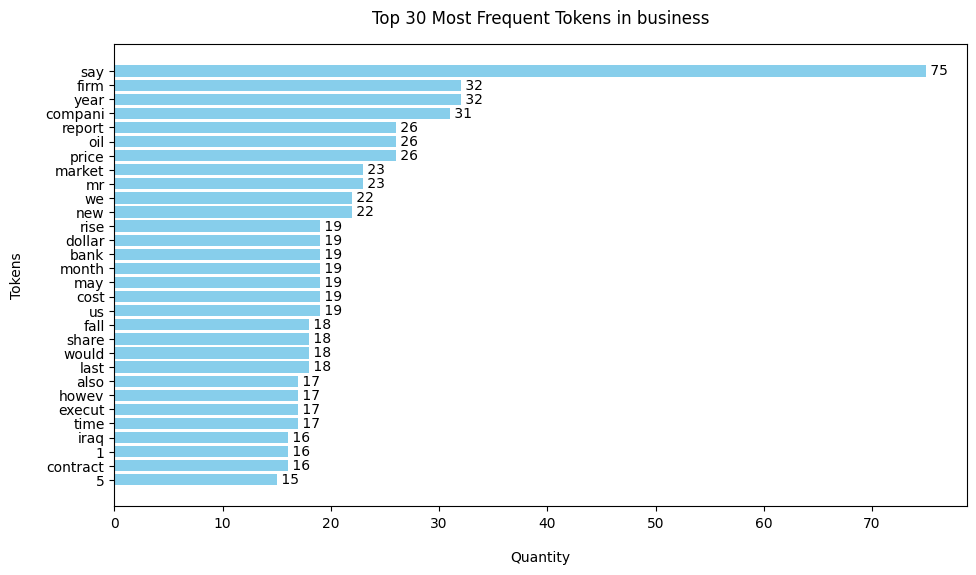

In [11]:
top_n = 30
fontsize = 12
title_business = 'Top {} Most Frequent Tokens in business'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'business', title_business, fontsize)
# common_words_business = get_top_n_words(top_n, count_content['business'])
# print(common_words_business)

##Top 30 most frequent tokens in entertainment




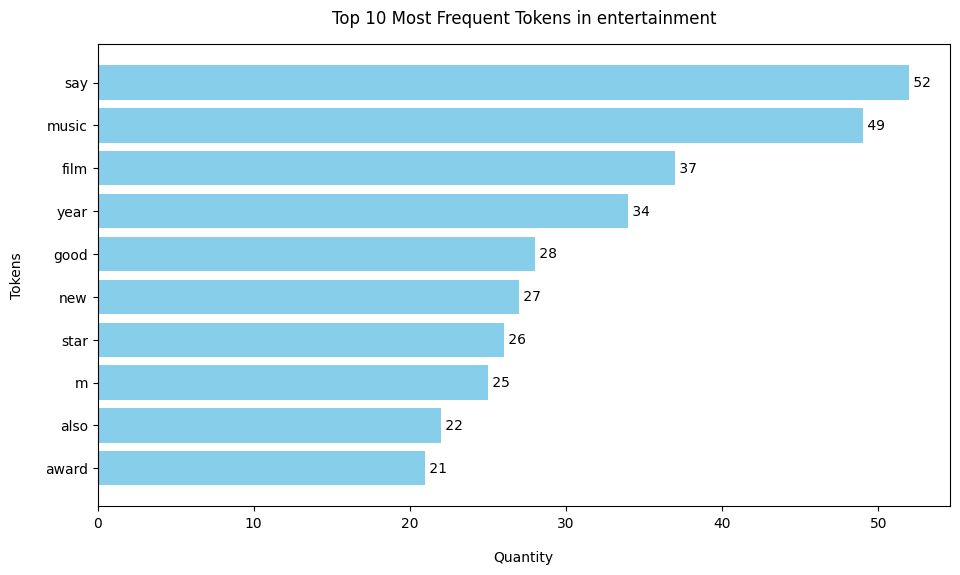

In [12]:
top_n = 10
fontsize = 12
title_entertainment = 'Top {} Most Frequent Tokens in entertainment'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'entertainment', title_entertainment, fontsize)
# common_words_entertainment = get_top_n_words(top_n, count_content['entertainment'])
# print(common_words_entertainment)

##Top 30 most frequent tokens in politics

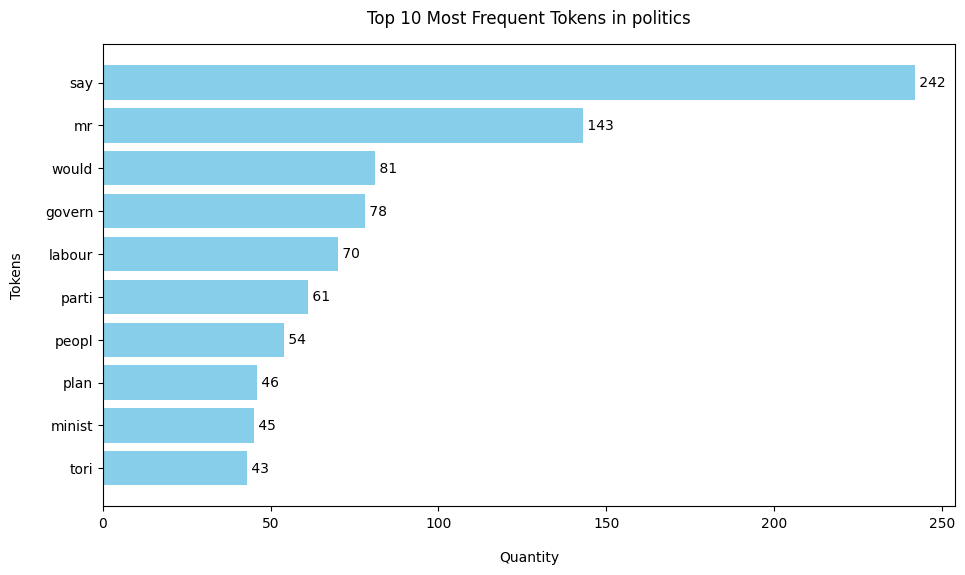

In [13]:
top_n = 10
fontsize = 12
title_politics = 'Top {} Most Frequent Tokens in politics'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'politics', title_politics, fontsize)
# common_words_politics = get_top_n_words(top_n, count_content['politics'])
# print(common_words_politics)

##Top 30 most frequent tokens in sport

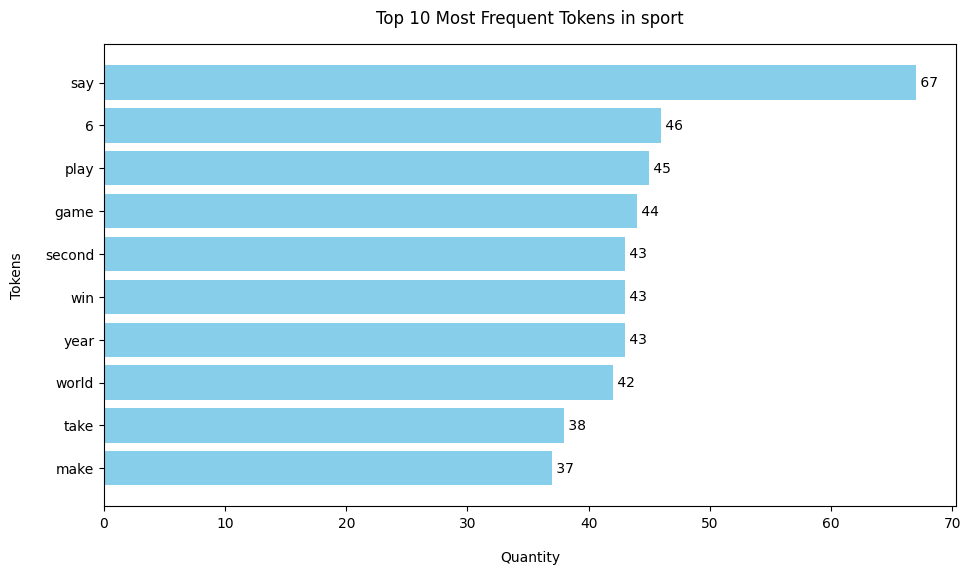

In [14]:
top_n = 10
fontsize = 12
title_sport = 'Top {} Most Frequent Tokens in sport'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'sport', title_sport, fontsize)
# common_words_sport = get_top_n_words(top_n, count_content['sport'])
# print(common_words_sport)

##Top 30 most frequent tokens in tech

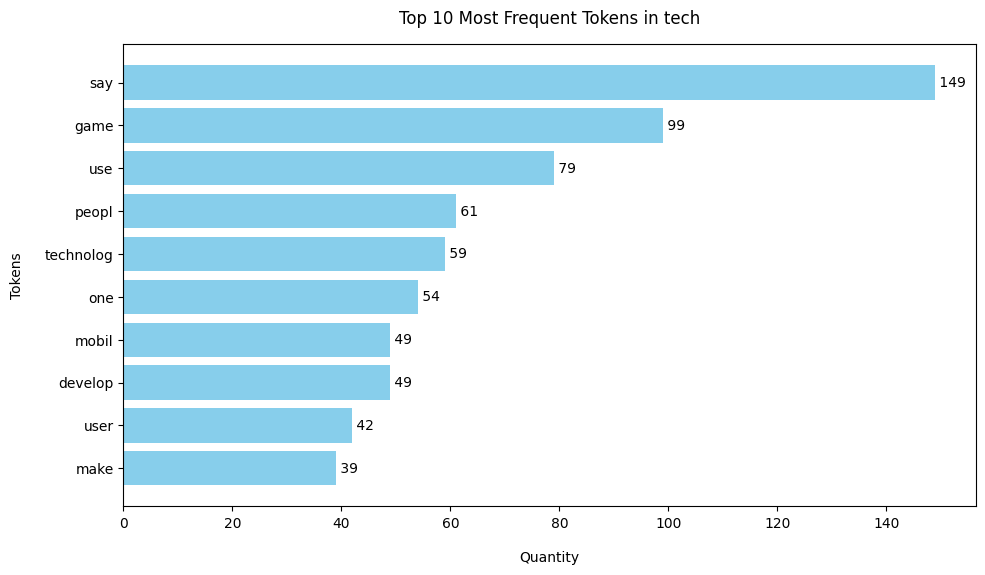

In [15]:
top_n = 10
fontsize = 12
title_tech = 'Top {} Most Frequent Tokens in tech'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'tech', title_tech, fontsize)
# common_words_tech = get_top_n_words(top_n, count_content['tech'])
# print(common_words_politics)

##Top 30 most frequent tokens in all dataset

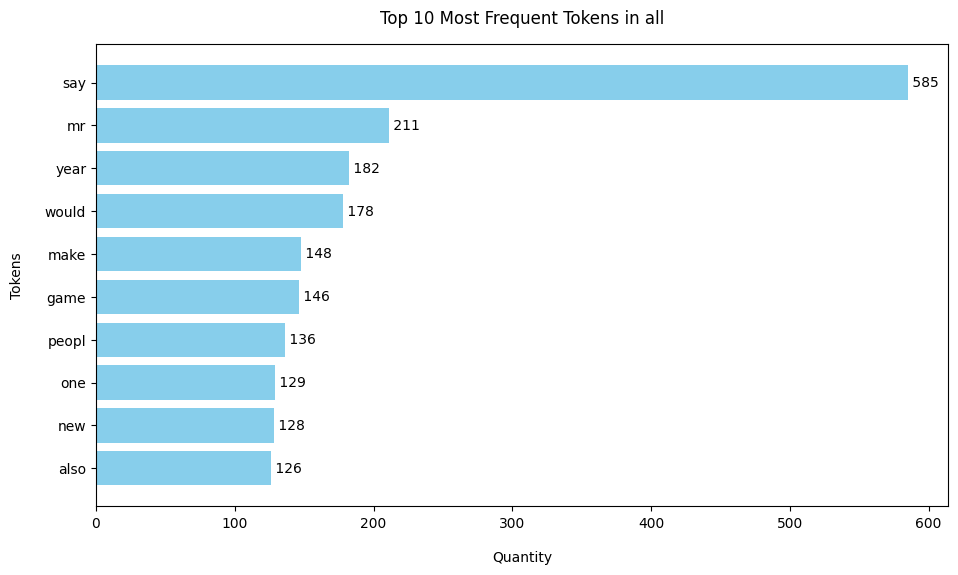

In [16]:
top_n = 10
fontsize = 12
title_all = 'Top {} Most Frequent Tokens in all'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'all', title_all, fontsize)
# common_words_all = get_top_n_words(top_n, count_content['all'])
# print(common_words_all)

#Frequency of class by word

In [17]:
import random

#Choose 10 random tokens in all content of news
random_words = random.sample(dict_content['all'].split(), 3)
print("random words: ", random_words)

def get_counts_by_genre(word, count_genres):
    counts_by_genre = {}  #Dictionary to store word count in each class
    for genre, content_counter in count_genres.items():
        if word in content_counter:
            counts_by_genre[genre] = content_counter[word]  # Adds the word count in the class to the dictionary
    return counts_by_genre


def get_frequency_class_by_word(selected_words, count_genres):
    dict_frequency = {}
    for word in selected_words:
        dict_frequency[word] = get_counts_by_genre(word, count_genres)
    return dict_frequency


dict_frequency = get_frequency_class_by_word(random_words, count_content)
print(dict_frequency)

random words:  ['limit', 'award', 'law']
{'limit': {'business': 4, 'all': 17, 'politics': 5, 'tech': 8}, 'award': {'business': 6, 'all': 43, 'politics': 3, 'tech': 9, 'sport': 4, 'entertainment': 21}, 'law': {'business': 9, 'all': 27, 'politics': 10, 'tech': 4, 'sport': 2, 'entertainment': 2}}


In [18]:
#Testing
df[df['genre']=='business']

,genre,filename,title,content
0,business,394.txt,US Airways staff agree to pay cut,union repres 5 200 flight attend bankrupt us a...
5,business,105.txt,Budget Aston takes on Porsche,british car maker aston martin go head head po...
9,business,318.txt,Mystery surrounds new Yukos owner,fate russia yuganskneftega oil firm sell littl...
10,business,391.txt,Yukos heading back to US courts,russian oil ga compani yuko due us court thurs...
12,business,455.txt,Qantas considers offshore option,australian airlin qanta could transfer mani 7 ...
14,business,329.txt,House prices drop as sales slow,hous price fall novemb properti sale time leng...
15,business,203.txt,'Standoff' on Deutsche's LSE bid,deutsch boers investor unhappi london stock ex...
16,business,475.txt,Watchdog probes Vivendi bond sale,french stock market regul amf file complaint m...
23,business,313.txt,Irish company hit by Iraqi report,share irish oil compani petrel resourc lose 50...
36,business,215.txt,SEC to rethink post-Enron rules,we stock market watchdog chairman say will sof...


# Frequency of words by documents

In [19]:
from collections import Counter

def get_frequency(df):
    frequency = {}
    for index, row in df.iterrows():
        filename = row['filename']
        word_counts = dict(Counter(row['content'].split()))
        if filename not in frequency:
          frequency[filename] = word_counts
    return frequency



frequency = get_frequency(df)
print(frequency)


{'394.txt': {'union': 2, 'repres': 2, '5': 1, '200': 1, 'flight': 1, 'attend': 1, 'bankrupt': 1, 'us': 2, 'airway': 2, 'agre': 1, 'new': 2, 'contract': 2, 'cut': 3, 'pay': 1, 'nearli': 2, '10': 1, 'deal': 2, 'help': 1, 'carrier': 3, 'tri': 1, 'surviv': 1, 'cost': 3, '1bn': 1, '530': 1, 'm': 2, 'year': 2, 'save': 1, '94': 1, 'two': 2, 'third': 1, '28': 1, '000': 1, 'staff': 2, 'accept': 1, 'wage': 1, 'talk': 1, 'still': 1, 'continu': 1, 'mechan': 1, 'baggag': 1, 'handler': 1, 'cleaner': 1, 'far': 1, 'fail': 1, 'negoti': 1, 'seventh': 1, 'larg': 1, 'we': 1, 'seek': 1, 'bankruptci': 2, 'protect': 1, 'second': 1, 'time': 1, 'last': 1, 'septemb': 1, 'one': 1, 'quick': 1, 'difficulti': 1, 'face': 2, 'aviat': 1, 'industri': 1, '9': 1, '11': 2, 'attack': 1, '2001': 1, 'emerg': 1, 'chapter': 1, 'march': 1, '2003': 1, 'competit': 1, 'low': 1, 'high': 1, 'fuel': 1, 'manag': 1, 'say': 1, 'may': 1, 'need': 1, 'start': 1, 'liquid': 1, 'asset': 1, 'receiv': 1, 'concess': 1, 'middl': 1, 'month': 1}, '

In [20]:
content_line = df['content'].iloc[0]
content_line

'union repres 5 200 flight attend bankrupt us airway agre new contract cut pay nearli 10 deal help carrier tri surviv cut cost nearli 1bn 530 m year save 94 m two third 28 000 staff accept wage cut talk still continu union repres mechan baggag handler cleaner far fail negoti new contract seventh larg carrier we seek bankruptci protect second time two year last septemb one quick deal difficulti face aviat industri 9 11 attack 2001 emerg chapter 11 bankruptci march 2003 face competit low cost carrier high fuel cost us airway manag say may need start liquid asset receiv concess staff middl month'

# Word Index by documents





In [21]:
def create_word_index(df):
    h = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        words = content.split()
        for word in words:
            if word not in h:
                h[word] = {}

            if filename not in h[word]:
                h[word][filename] = 1
            else:
                h[word][filename] += 1
    return h

word_index = create_word_index(df)
print(word_index)

{'union': {'394.txt': 2, '455.txt': 2, '258.txt': 1, '203.txt': 1, '382.txt': 1, '334.txt': 1, '289.txt': 3, '003.txt': 1, '069.txt': 1, '311.txt': 8}, 'repres': {'394.txt': 2, '082.txt': 2, '013.txt': 1, '215.txt': 1, '200.txt': 1, '020.txt': 1, '192.txt': 2, '239.txt': 1, '377.txt': 1, '151.txt': 1, '047.txt': 1, '160.txt': 1}, '5': {'394.txt': 1, '496.txt': 1, '101.txt': 1, '203.txt': 2, '313.txt': 2, '181.txt': 1, '175.txt': 3, '321.txt': 1, '049.txt': 2, '080.txt': 3, '174.txt': 2, '159.txt': 2, '218.txt': 2, '144.txt': 1, '451.txt': 3, '440.txt': 4, '140.txt': 1, '446.txt': 2, '069.txt': 2, '396.txt': 1, '032.txt': 2, '360.txt': 3, '226.txt': 1, '364.txt': 2, '328.txt': 2, '180.txt': 1, '507.txt': 1, '262.txt': 4, '389.txt': 1}, '200': {'394.txt': 1, '126.txt': 1, '069.txt': 2, '047.txt': 1}, 'flight': {'394.txt': 1, '455.txt': 2}, 'attend': {'394.txt': 1, '455.txt': 2, '381.txt': 1, '334.txt': 2}, 'bankrupt': {'394.txt': 1}, 'us': {'394.txt': 2, '259.txt': 1, '391.txt': 1, '334.

In [22]:
df[df['filename']=='017.txt']

,genre,filename,title,content


# Seach

## Pre processing in seach query

In [23]:
query = 'russian movie'
query = pre_processing_aux(query)
print(query)

russian movi


## Search query

In [24]:
def get_frequency_query(query, word_index):
    query_index = {}
    for word in query.split():
        if word in word_index:
            query_index[word] = word_index[word]
    return query_index


index_query = get_frequency_query(query, word_index)
print(index_query)


def sum_occurrences(index_query):
    f = {}
    for word_dict in index_query.values():
        for filename, count in word_dict.items():
            if filename not in f:
                f[filename] = count
            else:
                f[filename] += count

    return f

occurrences = sum_occurrences(index_query)
print(occurrences)

{'russian': {'391.txt': 5, '181.txt': 1, '440.txt': 1, '446.txt': 2, '069.txt': 3}, 'movi': {'025.txt': 1, '301.txt': 2, '306.txt': 1, '140.txt': 1, '309.txt': 1, '093.txt': 1, '364.txt': 3}}
{'391.txt': 5, '181.txt': 1, '440.txt': 1, '446.txt': 2, '069.txt': 3, '025.txt': 1, '301.txt': 2, '306.txt': 1, '140.txt': 1, '309.txt': 1, '093.txt': 1, '364.txt': 3}


In [25]:
def sort_sum_occurrences(occurrences):
  sorted_occurences = sorted(occurrences.items(), key=lambda x : x[1], reverse=True) #reverse is descr order
  return sorted_occurences

sorted_occurences = sort_sum_occurrences(occurrences)
print(sorted_occurences)

def get_top_n_docs(occurences, top_n):
  occurences = dict(occurences)
  docs = list(occurences.keys())[:top_n]
  return docs


top_n = 5
docs = get_top_n_docs(sorted_occurences, top_n)
print(docs)

[('391.txt', 5), ('069.txt', 3), ('364.txt', 3), ('446.txt', 2), ('301.txt', 2), ('181.txt', 1), ('440.txt', 1), ('025.txt', 1), ('306.txt', 1), ('140.txt', 1), ('309.txt', 1), ('093.txt', 1)]
['391.txt', '069.txt', '364.txt', '446.txt', '301.txt']


In [26]:
df[df['filename']=='157.txt']

,genre,filename,title,content


alguns filenames estao duplicados